In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load in the dataset
df = pd.read_csv('/Users/avishandilya/Desktop/Google Analytics Cert/Capstone project/Dataset/Cyclistic_data_2019_2020.csv')

In [55]:
df.head()

,trip_id,date,weekday,start_time,end_time_time,ride_length1,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,route_id,usertype,trip_duration_minutes,weekday_name,start_hour,day_type
0,A21742443,01/01/2019,2,1900-01-01 00:04:37,00:11:07,00:06:30,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,199 to 84,member,6.500000,Tuesday,0,Weekday
1,A21742444,01/01/2019,2,1900-01-01 00:08:13,00:15:34,00:07:21,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),44 to 624,member,7.350000,Tuesday,0,Weekday
2,A21742445,01/01/2019,2,1900-01-01 00:13:23,00:27:12,00:13:49,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),15 to 644,member,13.816667,Tuesday,0,Weekday
3,A21742446,01/01/2019,2,1900-01-01 00:13:45,00:43:28,00:29:43,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,123 to 176,member,29.716667,Tuesday,0,Weekday
4,A21742447,01/01/2019,2,1900-01-01 00:14:52,00:20:56,00:06:04,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,173 to 35,member,6.066667,Tuesday,0,Weekday


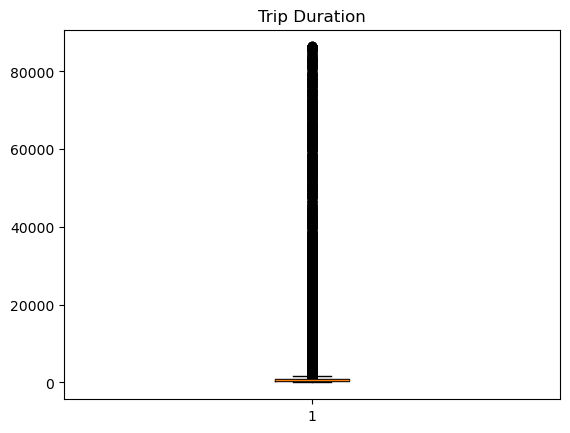

In [3]:
plt.boxplot(df['trip_duration'])
plt.title('Trip Duration')
plt.show()

Text(0, 0.5, 'Time (s)')

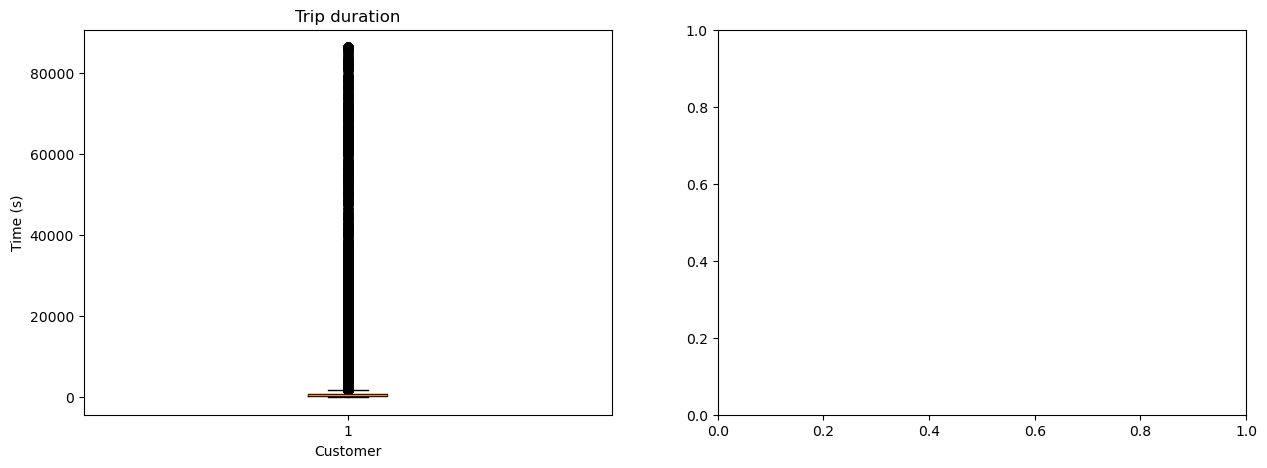

In [7]:
# df['trip_duration'] = np.random.normal(0, 1,791951)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].boxplot(df['trip_duration'])
axs[0].set_title('Trip duration')
axs[0].set_xlabel('Customer')
axs[0].set_ylabel('Time (s)')





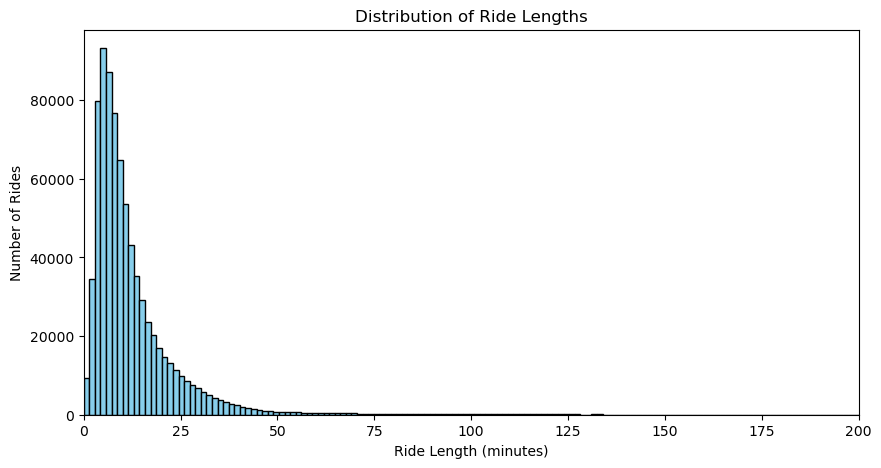

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(df['trip_duration'] / 60, bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride Lengths')
plt.xlim(0, 200)
plt.show()

In [34]:
print(df['trip_duration'].dtype)


float64


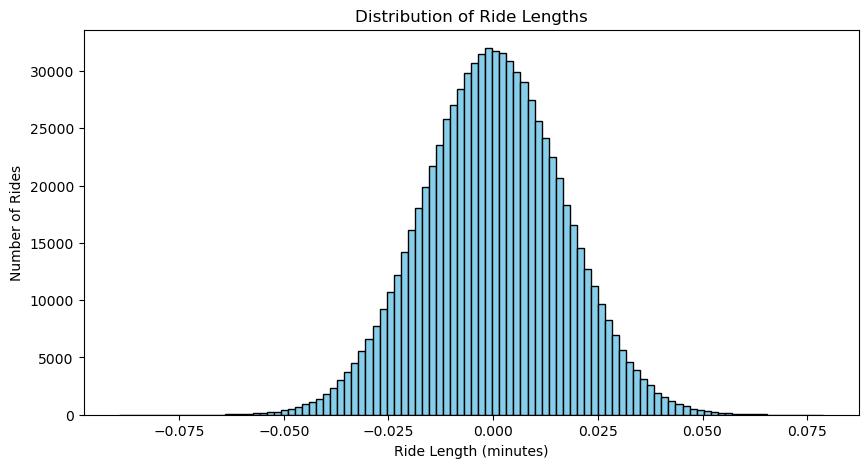

In [36]:
df['ride_length_minutes'] = df['trip_duration'] / 60

plt.figure(figsize=(10, 5))
plt.hist(df['ride_length_minutes'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride Lengths')
plt.show()

In [9]:
print(df['trip_duration'].min())   # Should be a small positive number (or 0)
print(df['trip_duration'].max())   # Should be something like 1300 * 60 = 78000+
print(df['trip_duration'].describe())

0
86399
count    791951.000000
mean        854.345828
std        2421.097554
min           0.000000
25%         328.000000
50%         537.000000
75%         910.000000
max       86399.000000
Name: trip_duration, dtype: float64


In [11]:
df.head()

,trip_id,date,weekday,start_time_time,end_time_time,ride_length1,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,route_id,usertype
0,A21742443,01/01/2019,2,00:04:37,00:11:07,00:06:30,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,199 to 84,member
1,A21742444,01/01/2019,2,00:08:13,00:15:34,00:07:21,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),44 to 624,member
2,A21742445,01/01/2019,2,00:13:23,00:27:12,00:13:49,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),15 to 644,member
3,A21742446,01/01/2019,2,00:13:45,00:43:28,00:29:43,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,123 to 176,member
4,A21742447,01/01/2019,2,00:14:52,00:20:56,00:06:04,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,173 to 35,member


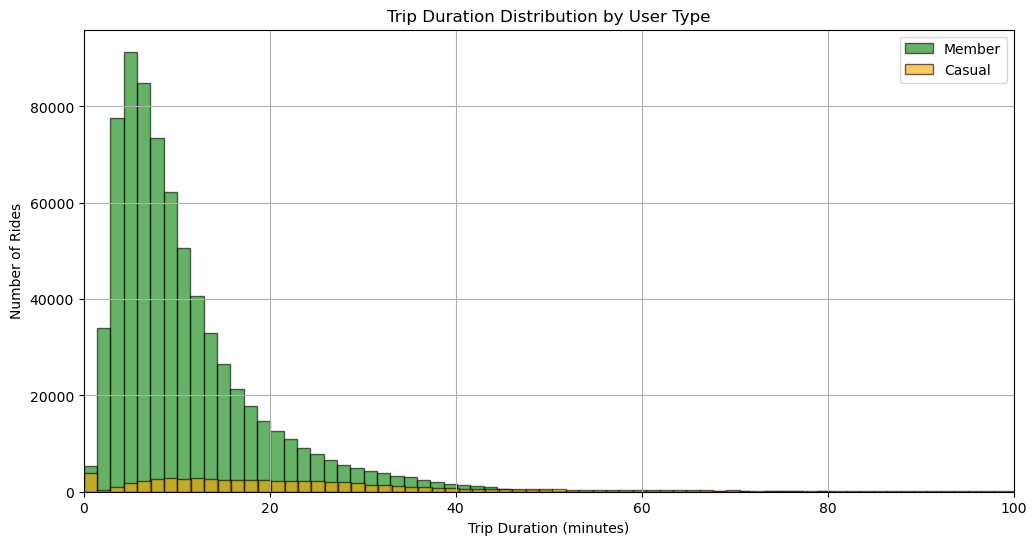

In [23]:


# Convert to minutes for readability
df['trip_duration_minutes'] = df['trip_duration'] / 60

plt.figure(figsize=(12, 6))

# Filter by user type
casual = df[df['usertype'] == 'casual']['trip_duration_minutes']
member = df[df['usertype'] == 'member']['trip_duration_minutes']

# Plot
plt.hist(member, bins=1000, alpha=0.6, label='Member', color='green', edgecolor='black')
plt.hist(casual, bins=1000, alpha=0.6, label='Casual', color='orange', edgecolor='black')

plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Rides')
plt.title('Trip Duration Distribution by User Type')
plt.legend()
plt.xlim(0, 100)  # Optional: zoom in to remove outliers
plt.grid(True)
plt.show()


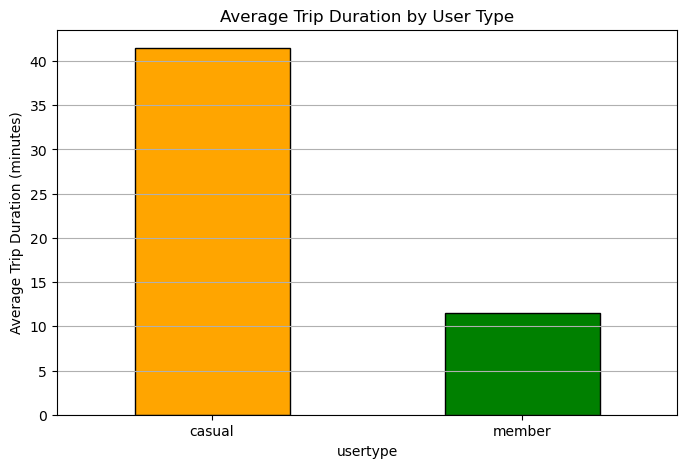

In [81]:
mean_durations = df.groupby('usertype')['trip_duration'].mean() / 60  # convert to minutes

plt.figure(figsize=(8, 5))
mean_durations.plot(kind='bar', color=['orange', 'green'], edgecolor='black')

plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by User Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('tripduration_chart.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


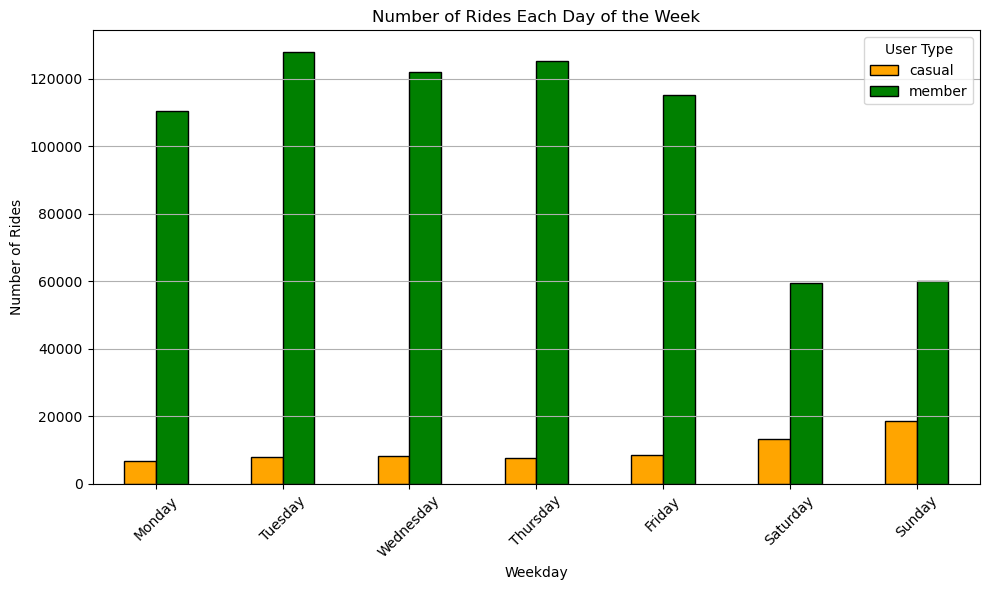

In [87]:
# Count of members and casuals by day

weekday_map = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

df['weekday_name'] = df['weekday'].map(weekday_map)

# Count rides by weekday name and usertype
weekday_counts = df.groupby(['weekday_name', 'usertype']).size().unstack()

# Ensure correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

# Plot
import matplotlib.pyplot as plt

weekday_counts.plot(kind='bar', figsize=(10, 6), color=['orange', 'green'], edgecolor='black')

plt.title('Number of Rides Each Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('dayoftheweek_chart.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


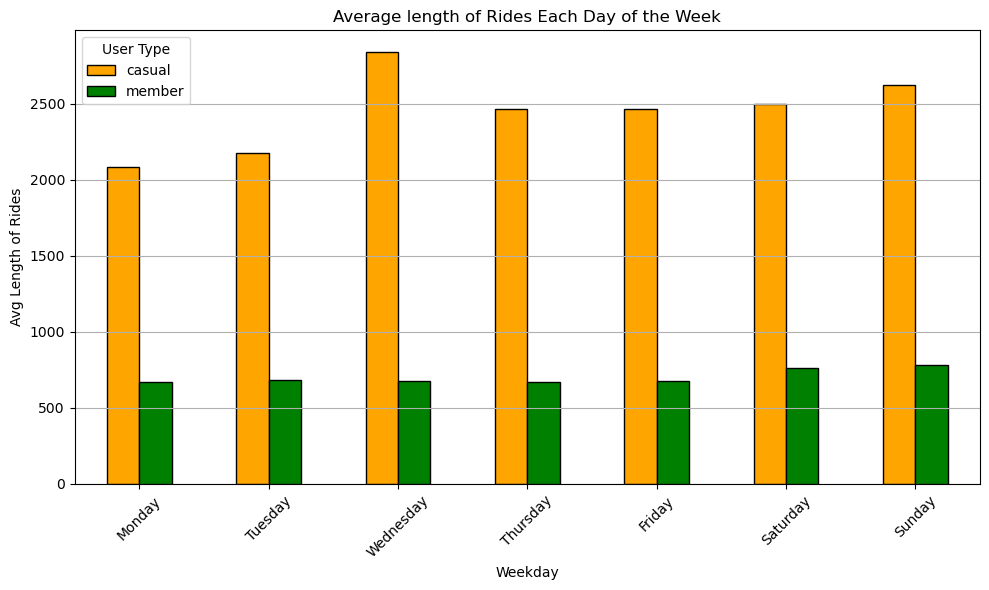

In [85]:
weekday_map = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

df['weekday_name'] = df['weekday'].map(weekday_map)

# Count rides by weekday name and usertype
weekday_counts = df.groupby(['weekday_name', 'usertype'])['trip_duration'].mean().unstack()

# Ensure correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

# Plot
import matplotlib.pyplot as plt

weekday_counts.plot(kind='bar', figsize=(10, 6), color=['orange', 'green'], edgecolor='black')

plt.title('Average length of Rides Each Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Avg Length of Rides')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('ridelengthdow_chart.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


In [41]:
df.rename(columns = {'start_time_time': 'start_time'}, inplace=True)

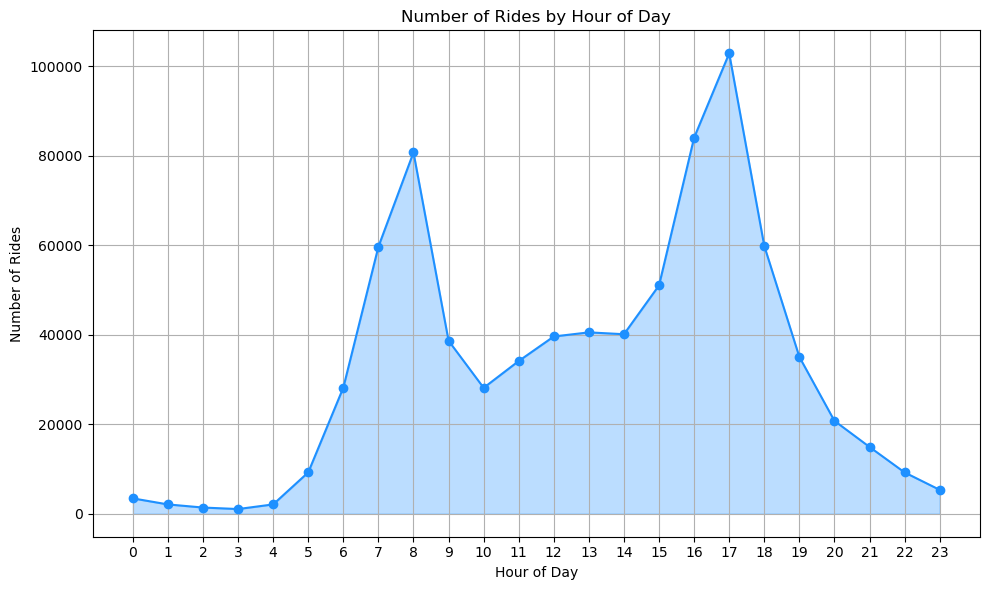

In [43]:
# Number of rides by hour of day

df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S')
df['start_hour'] = df['start_time'].dt.hour

df['start_hour'] = df['start_time'].dt.hour
hourly_counts = df['start_hour'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='dodgerblue')
plt.fill_between(hourly_counts.index, hourly_counts.values, alpha=0.3, color='dodgerblue')

plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

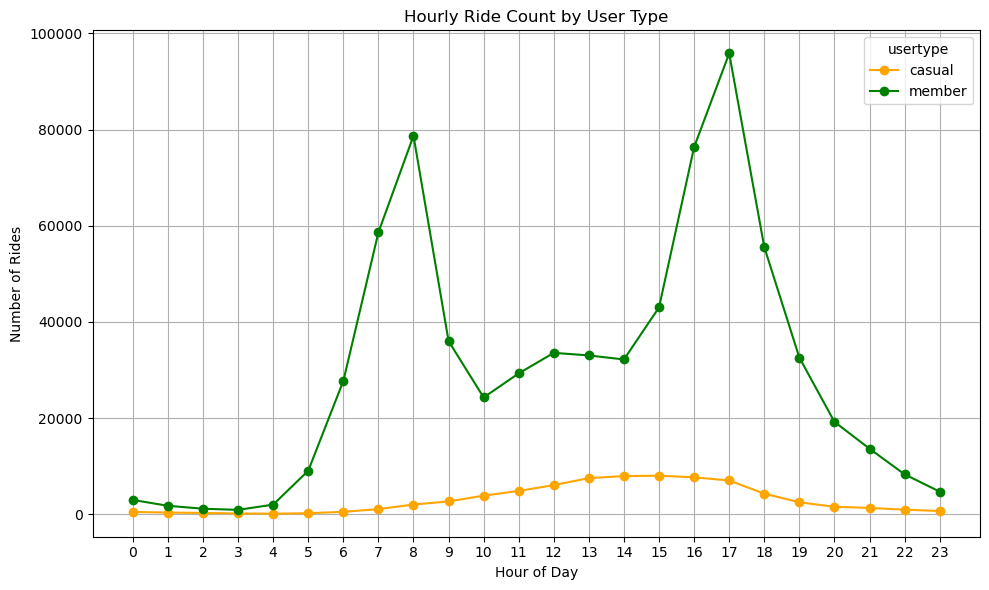

In [89]:
hourly_by_user = df.groupby(['start_hour', 'usertype']).size().unstack()

hourly_by_user.plot(kind='line', figsize=(10, 6), marker='o', color={'casual': 'orange', 'member': 'green'})
plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ride Count by User Type')
plt.grid(True)
plt.tight_layout()
plt.savefig('timeofday_chart.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


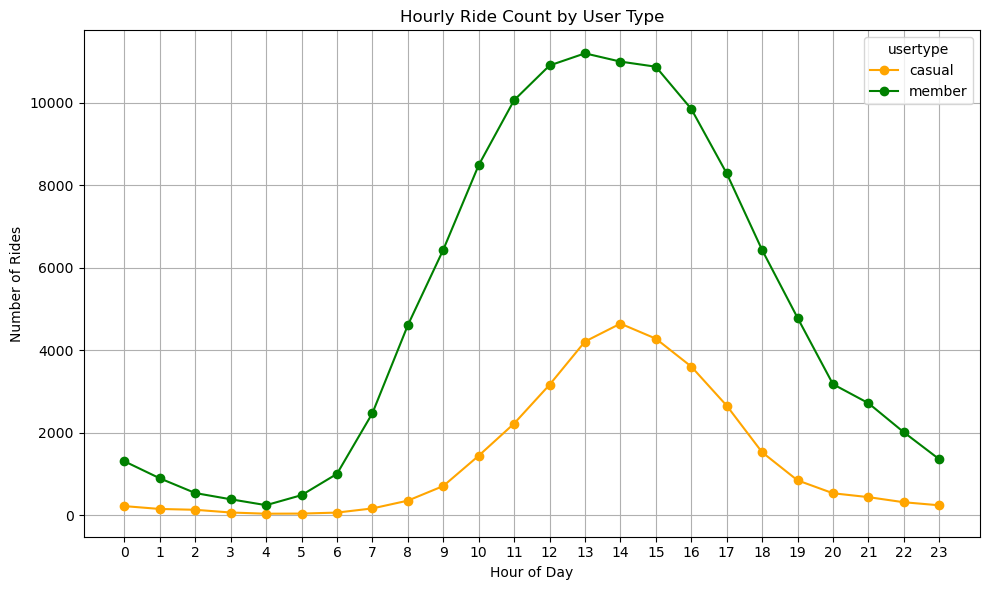

In [91]:
# First filter for weekend rides (weekday 6 = Saturday, 7 = Sunday)
weekend_df = df[df['weekday'].isin([6, 7])]
hourly_by_user = weekend_df.groupby(['start_hour', 'usertype']).size().unstack()

hourly_by_user.plot(kind='line', figsize=(10, 6), marker='o', color={'casual': 'orange', 'member': 'green'})
plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ride Count by User Type')
plt.grid(True)
plt.tight_layout()
plt.savefig('timeofweekend_chart.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


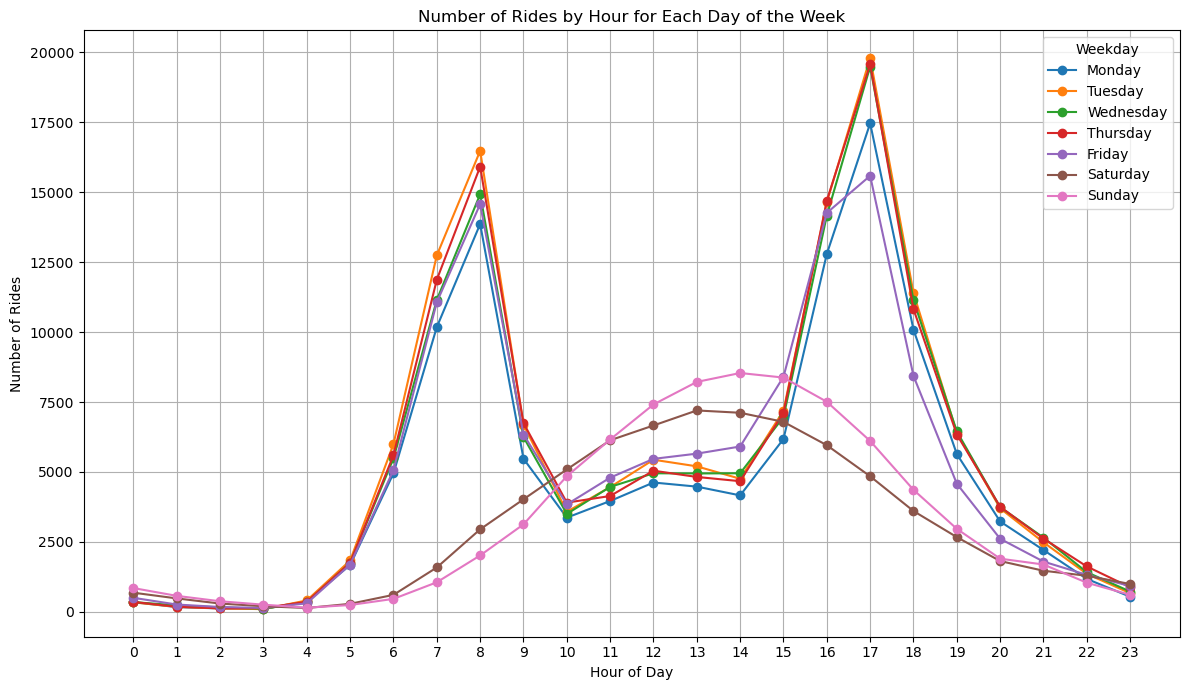

In [49]:
hourly_weekday = df.groupby(['weekday_name', 'start_hour']).size().unstack(fill_value=0)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_weekday = hourly_weekday.reindex(weekday_order)

plt.figure(figsize=(12, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

for i, weekday in enumerate(hourly_weekday.index):
    plt.plot(hourly_weekday.columns, hourly_weekday.loc[weekday], label=weekday, color=colors[i], marker='o')

plt.title('Number of Rides by Hour for Each Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Weekday')
plt.tight_layout()
plt.show()


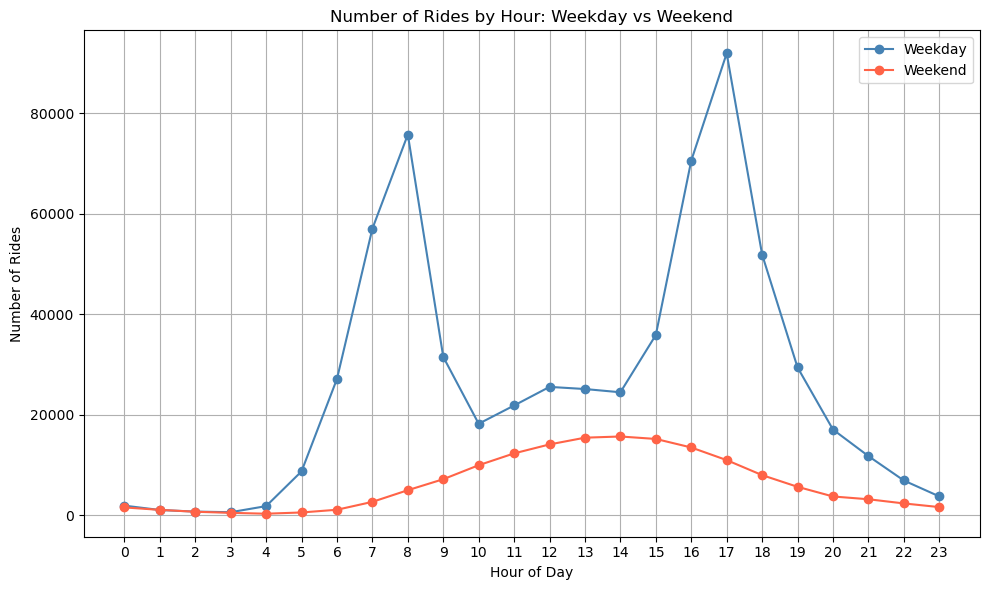

In [51]:
df['day_type'] = df['weekday_name'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

hourly_daytype = df.groupby(['day_type', 'start_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

plt.plot(hourly_daytype.columns, hourly_daytype.loc['Weekday'], label='Weekday', color='steelblue', marker='o')
plt.plot(hourly_daytype.columns, hourly_daytype.loc['Weekend'], label='Weekend', color='tomato', marker='o')

plt.title('Number of Rides by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

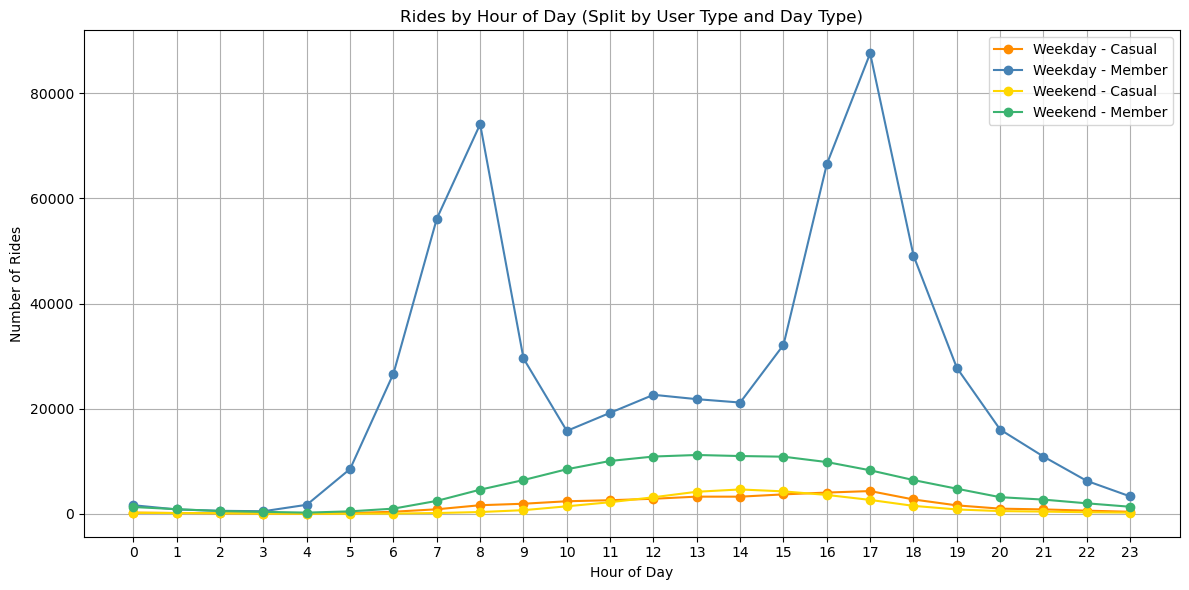

In [93]:
grouped = df.groupby(['day_type', 'usertype', 'start_hour']).size().reset_index(name='ride_count')

pivoted = grouped.pivot_table(
    index='start_hour',
    columns=['day_type', 'usertype'],
    values='ride_count',
    fill_value=0
)

plt.figure(figsize=(12, 6))

# Plotting all 4 combinations
plt.plot(pivoted.index, pivoted[('Weekday', 'casual')], label='Weekday - Casual', color='darkorange', marker='o')
plt.plot(pivoted.index, pivoted[('Weekday', 'member')], label='Weekday - Member', color='steelblue', marker='o')
plt.plot(pivoted.index, pivoted[('Weekend', 'casual')], label='Weekend - Casual', color='gold', marker='o')
plt.plot(pivoted.index, pivoted[('Weekend', 'member')], label='Weekend - Member', color='mediumseagreen', marker='o')

plt.title('Rides by Hour of Day (Split by User Type and Day Type)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('timeofdaycombined_chart.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

In [57]:
# Statistical Analysis - comparing the mean trip durations of members and casuals

Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
df_clean = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]




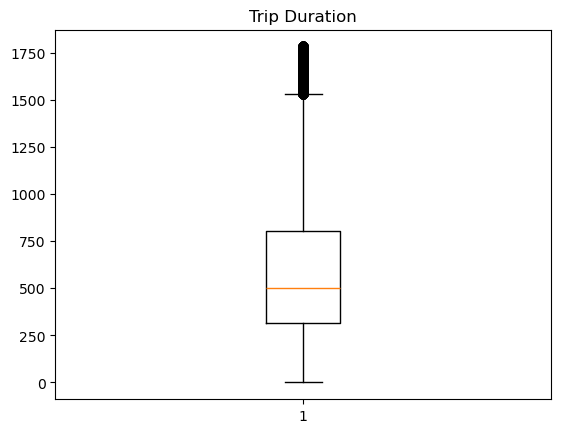

In [59]:
plt.boxplot(df_clean['trip_duration'])
plt.title('Trip Duration')
plt.show()

In [63]:
from scipy.stats import ttest_ind

# Split by usertype
casual = df_clean[df_clean['usertype'] == 'casual']['trip_duration']
member = df_clean[df_clean['usertype'] == 'member']['trip_duration']

# Perform Welch's t-test (safer if variances are unequal)
t_stat, p_value = ttest_ind(casual, member, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret
if p_value < 0.05:
    print("✅ The difference in trip duration between casual and member users is statistically significant.")
else:
    print("❌ The difference is not statistically significant.")


T-statistic: 129.57
P-value: 0.0000
✅ The difference in trip duration between casual and member users is statistically significant.


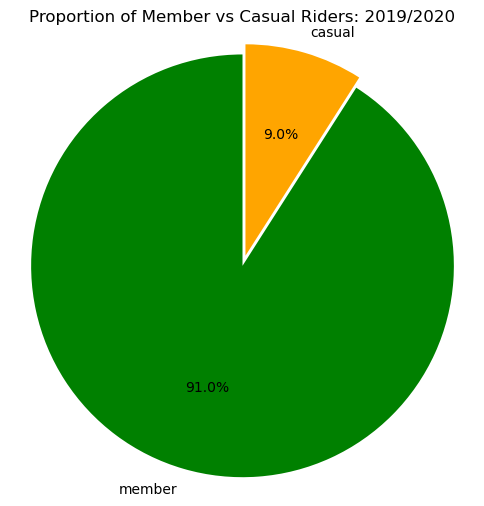

In [79]:
# Proportion of member vs casual riders

# Count number of rides for each usertype
user_counts = df['usertype'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    user_counts,
    labels=user_counts.index,
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,      # Rotate to start from top
    colors=['green', 'orange'],  # Custom colors (optional)
    explode=(0.05, 0)   # Slightly separate the first slice (optional)
)
plt.title('Proportion of Member vs Casual Riders: 2019/2020')
plt.axis('equal')  # Make the pie circular

plt.savefig('cyclistic_pie_chart.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


